  # Граф видимости и планирование движения

## Нахождение любого пути между точками с препятствиями

Для начала рассмотрим движение материальной точки.<br>
<img src="images/trap_map.png" style="float: right; width: 250px" />
Эту задачу можно решить с помощью трапецоидной карты. По ней строится граф, ребра которого соединяют центры трапедоидов, а также начальную и конечную вершины с серединами вертикальных сторон трапецоидов. В таком графе ищется путь между начальной и конечной вершинами.<br>
Если точки лежат внутри одного трапецоида — ответ найден. Иначе идём из стартовой точки в центр её трапецоида, далее по построенным рёбрам ищем трапецоид содержащий финальную точку. Для этого можно использовать поиск в ширину или другой алгоритм нахождения кратчайшего пути в графе. В итоге мы соединяем середину последнего трапецоида с конечной вершиной.<br>
Данный алгоритм работает за $O(n \log n)$ и за линейное количество памяти и хорошо подходит для нахождения какого-нибудь пути между парой данных вершин. Но если нужно найти кратчайший путь, этот алгоритм не подходит, хоть и работает быстро. Однако, решения нахождения кратчайшего пути в лучшем случае работают за $O(n^2)$ времени и памяти (здесь и далее $n$ — количество всех вершин).


## Нахождение кратчайшего пути между точками с препятствиями

### Граф видимости
Рассмотрим точное решение нахождения кратчайшего пути на плоскости между двумя точками с полигональными препятствиями с помощью построения графа видимости. После его построения, как и в случае с трапецоидной картой, кратчайший путь ищется любым стандартным алгоритмом поиска (например, алгоритмом Дейкстры).<br>
Для простоты рассуждений начальную и конечную вершины будем считать вершинами полигонов.

<img src="images/short_cut.png" style="float: right; width: 250px" />
**Лемма (о кратчайшем пути)**<br>
*Всякий кратчайший путь между $p_s$ и $p_f$ среди множества S непересекающихся многоугольных объектов является ломаной, внутренние вершины которой совпадают с вершинами $S$*<br>
$\triangleright$
<div style="padding-left:40px">
Предположим противное — что кратчайший путь $\tau$  не является ломаной. Т.к. все препятствия — многоугольники, то это означает, что существует точка p, принадлежащая $\tau$, которая находится во внутренности свободного пространства и обладает тем свойством, что ни один отрезок прямой, содержащий $p$, не принадлежит $\tau$. Поскольку $p$ находится во внутренности свободного пространства, то существует круг положильного радиуса с цетром в $p$, целиком принадлежащий свободному пространству. Но тогда часть $\tau$  внутри круга, не являющуюся отрезком прямой, можно укоротить, заменив ее отрезком, который соединяет точки, где эта часть входит в круг и выходит из него. Это противоречит оптимальности $\tau$, поскольку всякий кратчайший путь должен быть и локально кратчайшим, т.е. любая его часть, соединяющая точки $q$ и $r$, должна быть кратчайшим путем из $q$ в $r$.

Теперь рассмотрим какую-нибудь вершину $v$ на пути $\tau$. Она не может находиться во внутренности свободного пространства: тогда существовал бы круг с цетром в $p$, целиком лежащий в свободном пространстве, и мы смогли бы заменить ту часть $\tau$  внутри этого круга, которая поворачивает в $v$, более коротким отрезком прямой. Аналогично $v$ не может находиться в относительной внутренности ребра препятствия: тогда сущетствовал бы круг с центров в $p$, половина которого находилась бы в свободном пространстве, и мы снова смогли бы заменить часть пути внутри круга более коротким отрезком прямой. Остается единственная возможность — $v$ является вершиной препятствия.
</div>


$\triangleleft$

**Определение:**<br>
Говорят, что вершина $u$ *видна* из $v$, если отрезок $uv$ не пересекает ни одного препятствия.

**Определение:**<br>
*Граф видимости* (англ. visibility graph) — граф, вершины которого — вершины полигонов. Между вершинами $u$ и $v$ существует ребро, если из $u$ *видна* $v$.<br>

В худшем случае в таком графе может быть $O(n^2)$ ребер. Однако по некоторым ребрам кратчайший путь точно не пройдет, и такие ребра из графа можно удалить.

<img src="images/delete_edge.png" style="float: right; width: 150px" />
**Лемма (о неиспользуемых вершинах)**<br>
* *Если существуют вершины $A$, $B$, $C$ одного препятствия и вершина $D$ такая, что поворот $DBA$ не совпадает с поворотом $DBC$, то ребро $DB$ не принадлежит кратчайшему пути и его можно удалить из графа. (См. поясняющую картинку справа)*
* *Все внутренние вершины, кроме вырожденного случая, (начальная/конечная точка лежит внутри выпуклой оболочки фигуры) можно игнорировать.*

$\triangleright$
<div style="padding-left:40px">
* Путь проходящий через ребро $BD$ будет длиннее, чем через соседей точки $B$, так как по неравенству треугольника $AB + BD > AD$
* Если случай не вырожденный, значит заход внутрь фигуры только увеличит суммарный путь, так как по неравенству треугольника расстояние между соседними выпуклыми вершинами всегда меньше суммы расстояний с учётом внутренней.

</div>


$\triangleleft$ 

По доказанным выше леммам любое ребро кратчайшего пути содержится в графе. Таким образом, для нахождения кратчайшего пути осталось найти кратчайший путь в этом графе от начальной до конечной вершины.

## Построение графа видимости

### Наивный алгоритм $(O(n ^ 3))$
Для каждой пары вершин проверяем, можно ли добавить ребро между ними, то есть нет ли пересечений с полигонами. $O(n^2)$ пар вершин и $O(n)$ ребер, то есть $O(n^3)$.<br>
Ниже представлена визуализация алгоритма для двух выпуклых полигонов.

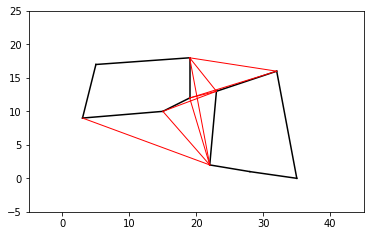

Accepted


In [7]:
from naive_algorithm import *

def build_graph_naive(first_polygon, second_polygon):
    
    # Здесь читателю прдлагается релизовать наивное построение графа видимости
    # Лемму о неиспользуемых вершинах НУЖНО игнорировать
    
    # first_polygon, second_polygon - массивы точек, образующие полигоны
    
    # нужно вернуть массив пар точек между которыми есть ребра в графе видимости
    
    return naive_algorithm(first_polygon, second_polygon) # заглушка

naive_task(build_graph_naive) 

### Построение заметающим лучом $(O(n ^ 2 \log n))$


<img src="images\zamrefr_1.png" style="float: left " />
<img src="images\zamrefr_2.png" style="float: left" />
<img src="images\zamrefr_3.png" style="float: left" />

Идея алгоритма проста: для каждой вершины найдем видимые из нее вершины. Если научиться делать это за $O(n \log  n)$, задача решена, так как всего точек $n$.<br>

Для каждой вершины будем рассматривать только правую половину плоскости, так как ребра, которые должны идти в левую половину, будут исходить из вершин, для которых текущая вершина будет справа.<br>

**Переформулируем задачу.**<br>
*Дано:* точка $v$ и множество отрезков — ребер препятствий.<br> 
*Найти:* множество концов отрезков, видимых из $v$.<br>

Для решения этой задачи будем использовать заметающий луч с началом в точке $v$. Его статусом будут отрезки, которые его пересекают, упорядоченные по возрастанию расстояния от точки $v$ до точки пересечения.

Точками событий будут концы отрезков.<br>
Пустим луч из рассматриваемой вершины $v$ вертикально вверх и добавим в статус все отрезки, которые он пересекает, по увеличению расстояния до них. 

Теперь будем рассматривать точки $w \in V$ в порядке сортировки по углу между $v$ и вертикальной полуосью $l$. 

При таком обходе для проверки видимости вершины достаточно проверить пересечение с ближайшим к $v$ отрезком, то есть первым в статусе (так как отрезки отсортированы по расстоянию до них). 

Действительно, если вершина $w$ не видна, то отрезок $vw$ пересекает несколько отрезков, лежащих перед $w$, а значит и ближайший. В противном случае все пересекаемые лучом отрезки лежат за вершиной $w$ и пересечения отрезка $vw$ с ближайшим отрезком не будет. Вне зависимости от видимости вершины, необходимо изменить статус заметающего луча. 

Для этого необходимо удалить из статуса все отрезки, которые заканчиваются вершине $w$ (лежат слева от прямой $vw$) и добавить все отрезки, которые в ней начинаются (лежат справа от прямой $vw$).<br>

В качестве статуса нужно использовать структуру данных, позволяющую добавлять и удалять из нее отрезки за $O(\log n)$ и извлекать минимум за $O(1)$ или $O(\log n)$. В этом случае достигается асимптотика $O(n^2 \log n)$, так как для каждой из $n$ точек выполняется сортировка за $O(n \log n)$, обновление статуса (суммарно $O(n \log n)$, так как каждый отрезок добавляется и удаляется из статуса не более одного раза) и запросы ближайшего отрезка ($O(\log n)$ или $O(1)$ на точку, то есть $O(n \log n)$ или $O(n)$).

Напомним, что для вычисления всего графа видимости нужно найти ответ для каждой из $n$ вершин. Получаем следующию теорему 

**Теорема**<br>
*Граф видимости множества $S$ непересекающихся многоугольных препятствий, имеющих в совокупности $n$ ребер, можно вычислить за время $O(n^2\log n)$*<br>

In [ ]:
from sweep_line_algorithm import *

def build_graph_fast(point, polygon):
    
    # Здесь читателю прдлагается релизовать построение графа видимости с помощью заметающей прямой
    
    # point - точка v из описания алгоритма
    # polygon - массив точек w, образующий полигон
    
    # нужно вернуть массив точек видимых из v
    
    return naive_algorithm(point, polygon) # заглушка

sweep_task(build_graph_fast) 

## Планирование движения
<img src="images/m_plan.png" style="float: right" />
Рассмотрим задачу нахождения кратчайшего пути, когда движимый объект — это выпуклый полигон. Например, робот, которого надо доставить из начальной в конечную точку.<br>

Если полигон вращать нельзя, задача сводится к движению точки так: выбирается точка на полигоне, которая принимается за начало координат. В такой системе координат для каждого препятствия считается сумма Минковского с полигоном. Получаются бОльшие препятствия, но теперь достаточно двигать выбранную точку, что было описано выше.<br>

Если полигон можно вращать, задача нахождения кратчайшего пути становится достаточно ресурсоёмка, поэтому обычно рассматривают задачу нахождения какого-нибудь пути между конечными точками.<br>

Первый шаг решения этой задачи совпадает с предыдущим случаем: выберем точку и построим сумму Минковского препятствий с полигоном. Рассмотрим малый угол $\varepsilon$. Представим, что поворот полигона на этот угол — это движение вверх-вниз между слоями, на каждом из которых посчитана сумма Минковского с полигоном, повернутым на этот угол.<br>

На каждом слое построим трапецоидную карту и граф, как описано в начале. Если пересечь соседние слои и добавить между их графами ребра, получится один большой граф, в котором ищется кратчайший путь.<br>

При таком подходе может возникнуть ошибка при пересечении слоев: на каждом слое состояния будут допустимые, а осуществить поворот физически будет невозможно. Обычно, эту проблему решают двумя способами: измельчением угла поворота и изначальным сглаживанием углов полигона. Первый способ повышает не только точность решения, но и вычислительную сложность задачи. Второй подход практически исключает возможность нахождения пути, когда его нет, но повышает вероятность "ненахождения" пути, когда он есть.